In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
dataframe = pd.read_csv('online_shoppers_intention.csv')

In [6]:
dataframe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
dataframe.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [9]:
cleanup = {"Month": {"Jan": 1,
                     "Feb": 2,
                     "Mar": 3,
                     "Apr": 4,
                     "May": 5,
                     "June": 6,
                     "Jul": 7,
                     "Aug": 8,
                     "Sep": 9,
                     "Nov": 10,
                     "Oct": 11,
                     "Dec": 12},
          "VisitorType":{
              "Returning_Visitor": 0,
              "New_Visitor": 1,
              "Other": 2
          }}

In [10]:
dataframe.replace(cleanup, inplace=True)
dataframe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,True,False


In [11]:
date = list(dataframe.Month)

date_sin = [math.sin(date[i]/12) for i in range (len(date))]
date_cos = [math.cos(date[i]/12) for i in range (len(date))]
dataframe['date_sin'] = date_sin
dataframe['date_cos'] = date_cos
dataframe = dataframe.drop('Month', axis=1)

In [12]:
upper_lim_Adm_Dur = dataframe['Administrative_Duration'].mean() + dataframe['Administrative_Duration'].std() * 3

dataframe.loc[(dataframe['Administrative_Duration'] > upper_lim_Adm_Dur),
              'Administrative_Duration'] = upper_lim_Adm_Dur

upper_lim_Inf_Dur = dataframe['Informational_Duration'].mean() + dataframe['Informational_Duration'].std() * 3

dataframe.loc[(dataframe['Informational_Duration'] > upper_lim_Inf_Dur),
              'Informational_Duration'] = upper_lim_Inf_Dur

upper_lim_Prd_Dur = dataframe['ProductRelated_Duration'].mean() + dataframe['ProductRelated_Duration'].std() * 3

dataframe.loc[(dataframe['ProductRelated_Duration'] > upper_lim_Prd_Dur),
              'ProductRelated_Duration'] = upper_lim_Prd_Dur


In [13]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

scaler = StandardScaler()

dataframe[to_scale] = scaler.fit_transform(dataframe[to_scale])

In [14]:
dataframe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,date_sin,date_cos
0,0,-0.574348,0,-0.319624,1,-0.781122,3.667189,3.229316,-0.317178,-0.308821,1,1,1,1,0,False,False,0.165896,0.986143
1,0,-0.574348,0,-0.319624,2,-0.736817,-0.457683,1.171473,-0.317178,-0.308821,2,2,1,2,0,False,False,0.165896,0.986143
2,0,-0.574348,0,-0.319624,1,-0.781122,3.667189,3.229316,-0.317178,-0.308821,4,1,9,3,0,False,False,0.165896,0.986143
3,0,-0.574348,0,-0.319624,2,-0.779276,0.573535,1.994610,-0.317178,-0.308821,3,2,2,4,0,False,False,0.165896,0.986143
4,0,-0.574348,0,-0.319624,10,-0.346721,-0.045196,0.142551,-0.317178,-0.308821,3,3,1,4,0,True,False,0.165896,0.986143


In [15]:
y = dataframe.Revenue
X = dataframe.drop('Revenue', axis=1)

In [16]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,date_sin,date_cos
0,0,-0.574348,0,-0.319624,1,-0.781122,3.667189,3.229316,-0.317178,-0.308821,1,1,1,1,0,False,0.165896,0.986143
1,0,-0.574348,0,-0.319624,2,-0.736817,-0.457683,1.171473,-0.317178,-0.308821,2,2,1,2,0,False,0.165896,0.986143
2,0,-0.574348,0,-0.319624,1,-0.781122,3.667189,3.229316,-0.317178,-0.308821,4,1,9,3,0,False,0.165896,0.986143
3,0,-0.574348,0,-0.319624,2,-0.779276,0.573535,1.994610,-0.317178,-0.308821,3,2,2,4,0,False,0.165896,0.986143
4,0,-0.574348,0,-0.319624,10,-0.346721,-0.045196,0.142551,-0.317178,-0.308821,3,3,1,4,0,True,0.165896,0.986143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.565161,0,-0.319624,53,0.453748,-0.310366,-0.288966,0.342125,-0.308821,4,6,1,1,0,True,0.841471,0.540302
12326,0,-0.574348,0,-0.319624,5,-0.458696,-0.457683,-0.447364,-0.317178,-0.308821,3,2,1,8,0,True,0.740177,0.672412
12327,0,-0.574348,0,-0.319624,6,-0.653571,1.261014,0.897093,-0.317178,-0.308821,3,2,1,13,0,True,0.740177,0.672412
12328,4,0.015053,0,-0.319624,15,-0.541596,-0.457683,-0.453140,-0.317178,-0.308821,2,2,3,11,0,False,0.740177,0.672412


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
pred = kmeans.labels_

accuracy_score(y, pred)

0.8125709651257097

In [18]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)

pred = model.labels_

accuracy_score(y, pred)

0.8450932684509327

In [19]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)

pred = model.labels_

accuracy_score(y, pred)

0.22935928629359287

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)

pred = model.labels_

accuracy_score(y, pred)

0.15660989456609894

In [18]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='average').fit(X)

pred = model.labels_

accuracy_score(y, pred)

0.8451743714517437

## Checkpoint 3

#### Szukanie optymalnej ilości klastrów 

#### Elbow method

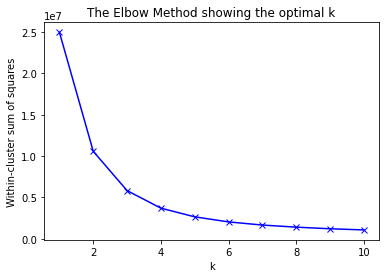

In [19]:
scores = []
k_max = 10
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss = kmeans.score(X) * -1
    scores.append(wcss)

x_ticks = list(range(1, len(scores) + 1))
plt.plot(x_ticks, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Metryki

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [105]:
k_max = 10
col = ["k","KMeans","Agglomerative_single","Agglomerative_ward",
       "Agglomerative_complete","Agglomerative_average"]
# silhouette_score
metric_silhouette = pd.DataFrame(columns=col)
for i in range(2,k_max+1):
    metric_silhouette = metric_silhouette.append(
        {"k" : i,
         "KMeans" : silhouette_score(dataframe, KMeans(n_clusters=i).fit_predict(dataframe)),
         "Agglomerative_single" : silhouette_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='single').fit_predict(dataframe)),
         "Agglomerative_ward" : silhouette_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='ward').fit_predict(dataframe)),
         "Agglomerative_complete" : silhouette_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='complete').fit_predict(dataframe)),
         "Agglomerative_average" : silhouette_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(dataframe)),},
        ignore_index=True)
    
# davies_bouldin_score
metric_davies_bouldin = pd.DataFrame(columns=col)
for i in range(2,k_max+1):
    metric_davies_bouldin = metric_davies_bouldin.append(
        {"k" : i,
         "KMeans" : davies_bouldin_score(dataframe, KMeans(n_clusters=i).fit_predict(dataframe)),
         "Agglomerative_single" : davies_bouldin_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='single').fit_predict(dataframe)),
         "Agglomerative_ward" : davies_bouldin_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='ward').fit_predict(dataframe)),
         "Agglomerative_complete" : davies_bouldin_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='complete').fit_predict(dataframe)),
         "Agglomerative_average" : davies_bouldin_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(dataframe))},
        ignore_index=True)
    
# calinski_harabasz_score
metric_calinski_harabasz = pd.DataFrame(columns=col)
for i in range(2,k_max+1):
    metric_calinski_harabasz = metric_calinski_harabasz.append(
        {"k" : i,
         "KMeans" : calinski_harabasz_score(dataframe, KMeans(n_clusters=i).fit_predict(dataframe)),
         "Agglomerative_single" : calinski_harabasz_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='single').fit_predict(dataframe)),
         "Agglomerative_ward" : calinski_harabasz_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='ward').fit_predict(dataframe)),
         "Agglomerative_complete" : calinski_harabasz_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='complete').fit_predict(dataframe)),
         "Agglomerative_average" : calinski_harabasz_score(dataframe, AgglomerativeClustering(n_clusters=i,linkage='average').fit_predict(dataframe))},
        ignore_index=True)

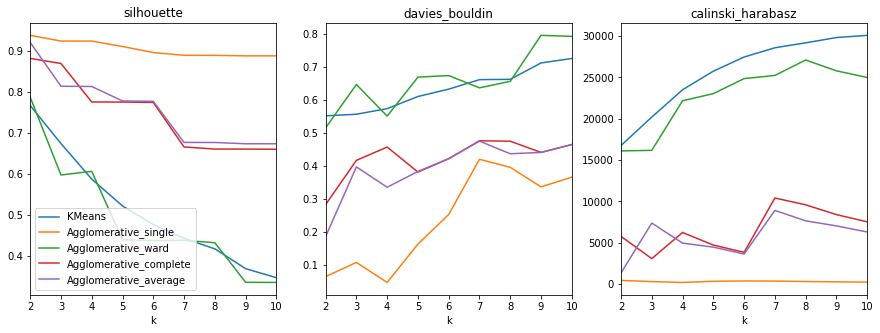

In [118]:
alg = ["KMeans","Agglomerative_single","Agglomerative_ward",
       "Agglomerative_complete","Agglomerative_average"]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.xticks(np.arange(1, k_max+1, 1.0))
metric_silhouette.plot(x="k",y=alg,ax=ax[0], title = "silhouette")
metric_davies_bouldin.plot(x="k",y=alg,ax=ax[1],legend=None, title = "davies_bouldin")
metric_calinski_harabasz.plot(x="k",y=alg,ax=ax[2],legend=None, title = "calinski_harabasz")
plt.show(fig)

In [153]:
from sklearn import preprocessing
s = metric_silhouette + preprocessing.normalize(metric_calinski_harabasz) + (1-metric_davies_bouldin)
s['k'] = range(2,k_max+1)
s

,k,KMeans,Agglomerative_single,Agglomerative_ward,Agglomerative_complete,Agglomerative_average
0,2,1.912752,1.891643,1.942217,1.838736,1.790857
1,3,1.862570,1.827240,1.547408,1.565592,1.688544
2,4,1.719420,1.882709,1.721196,1.505212,1.626424
3,5,1.643690,1.756952,1.425303,1.527640,1.521358
4,6,1.577590,1.652757,1.427826,1.454731,1.451962
5,7,1.486566,1.477376,1.424117,1.446075,1.421229
6,8,1.454973,1.500180,1.425989,1.415544,1.423018
7,9,1.385494,1.557459,1.170284,1.424695,1.404426
8,10,1.367361,1.527463,1.162385,1.381801,1.364789


In [200]:
print("Clusters number : ",s.drop('k',axis=1).max(axis=1).idxmax()+2)
print("Best algorithm  : ",s.drop('k',axis=1).max(axis=0).idxmax())

Clusters number :  2
Best algorithm  :  Agglomerative_ward


In [31]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(dataframe)

accuracy_score(y, model)

0.8253041362530413